## K Means clustering algorithm
Here, all we have is set of features. We dont know about the target variable or class label. </br>
We try to understand the underlying structure in the data or try to find clusters in the data to make predictions out of the data. </br>
We dont have any information on target variables </br>
We cluster the dataset to find out some characteristics of these groups

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("csv/incomes.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Micheal,29,90000
2,Mohan,29,61000
3,Ismael,28,60000
4,Kory,42,150000


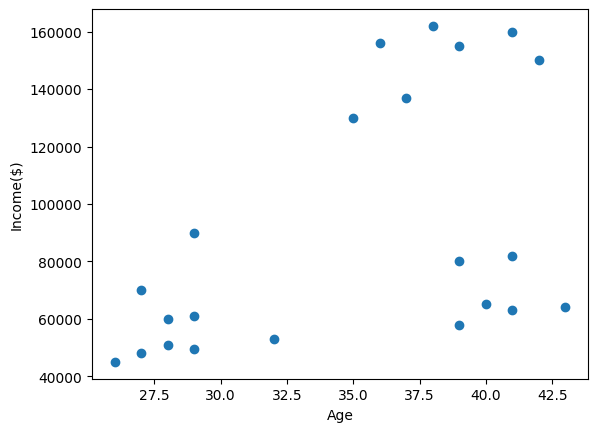

In [3]:
# plot a scater plot
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.scatter(df["Age"],df["Income($)"])

we can observe 3 clusters. This makes choosing K much easier

In [4]:
# create KMeans object
# we use 3 clusters and run the k-means algorithm 10 times with different centroid seeds
km = KMeans(n_clusters=3,n_init=10)
km

KMeans(n_clusters=3, n_init=10)

In [5]:
# lets train and make predictions
# this identifies 3 clusters and assign them new labels ie 0,1 &2
y_predited = km.fit_predict(df[["Age","Income($)"]])
y_predited

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [6]:
# lets append the clusters to our dataframe
df["cluster"] = y_predited
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Micheal,29,90000,2
2,Mohan,29,61000,0
3,Ismael,28,60000,0
4,Kory,42,150000,1


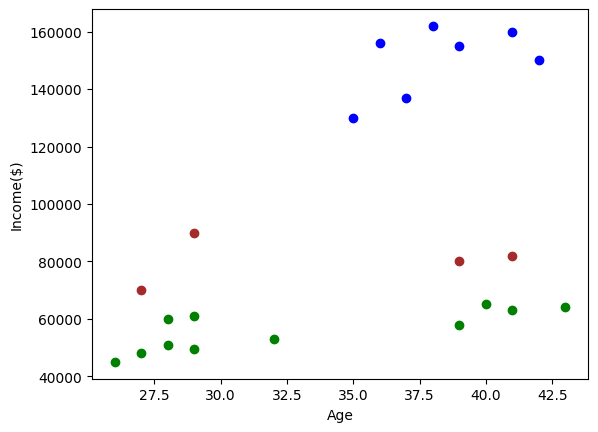

In [7]:
# now lets plot the resutant on a scatter plot
# lets separate these clusters
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.scatter(df0["Age"],df0["Income($)"], color="green")
plt.scatter(df1["Age"],df1["Income($)"],color="blue")
plt.scatter(df2["Age"],df2["Income($)"],color="brown")

Blue and brown clusters are not grouped correctly, this is coz our scaling is not right. </br>
Our x axis is pretty narrow. So we have to scale the features properly using MinMaxScaler

In [8]:
# lets now scale the income. This will make the scale 0 to 1 on the y-axis
# lets scale the age also
scaler = MinMaxScaler()
scaler.fit(df[["Income($)","Age"]])
df[["Income($)","Age"]]=scaler.transform(df[["Income($)","Age"]])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Micheal,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismael,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [9]:
# use K Cluster model to train our scale dataset
km = KMeans(n_clusters=3, n_init="auto")
y_predited=km.fit_predict(df[["Age","Income($)"]])
y_predited

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [10]:
# lets drop the previous cluster and update with new one
df["cluster"] = y_predited
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Micheal,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismael,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angellina,0.529412,0.726496,0


In [14]:
# our centroids
# they are in form of X,Y
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

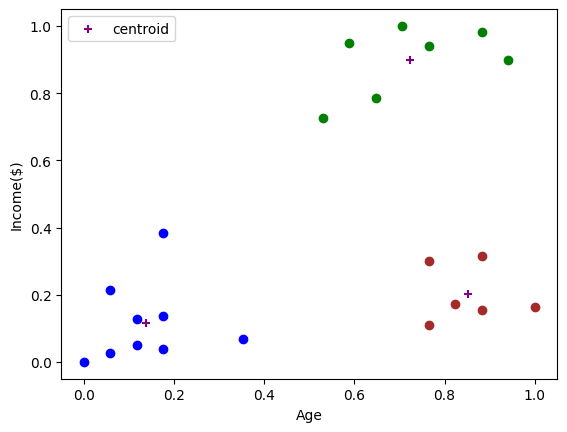

In [16]:
# now lets plot it on a scatter plot with the centroids
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.scatter(df0["Age"],df0["Income($)"], color="green")
plt.scatter(df1["Age"],df1["Income($)"],color="blue")
plt.scatter(df2["Age"],df2["Income($)"],color="brown")
# [:,0] means all rows first column, [:,1] means all rows second column
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="purple",marker="+",label="centroid")
plt.legend()

###  Lets use the elbow plot method, for a big dataset
you could have a dataset with like 20 features thats hard to plot and easily gets messy </br>
We go through a number of K's eg 1-10 and try to calculate SSE(sum of square error) and then plot them. Then find the elbow

In [18]:
# lets define k range from 1-10
# we will find sse and store all the values in the array and then plot the result
# inertia will give the sum of sqr error and append it ot sse
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k,n_init=10)
    km.fit(df[["Age","Income($)"]])
    sse.append(km.inertia_)

In [19]:
# print sse
sse

[5.434011511988178,
 2.091136388699078,
 0.4750783498553096,
 0.3625079900797329,
 0.26640301246684156,
 0.22407006551788156,
 0.17681044133887713,
 0.1397684499538816,
 0.10188787724979426]

sse was initially high and then kept on reducing

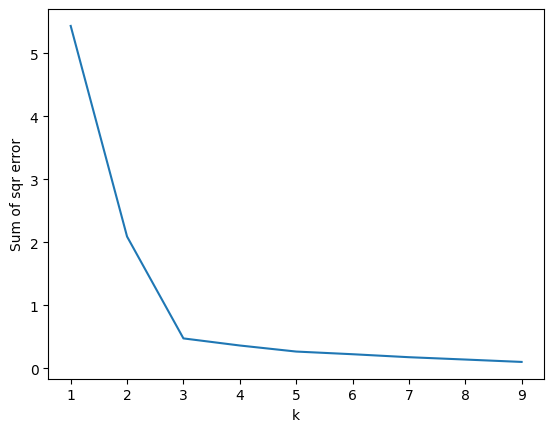

In [21]:
# now lets plot sse in chart
plt.xlabel("k")
plt.ylabel("Sum of sqr error")
plt.plot(k_rng,sse)

from the chart, we can see that k (elbow) is 3

## Exercise

1. use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
2. Figure out if any preprocessing such as scaling would help here.
3. Draw elbow plot and from that figure out optimal value of K

In [45]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris

In [46]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [47]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [48]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [51]:
final = iris_df.drop(["sepal length (cm)","sepal width (cm)"], axis=1)
final.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


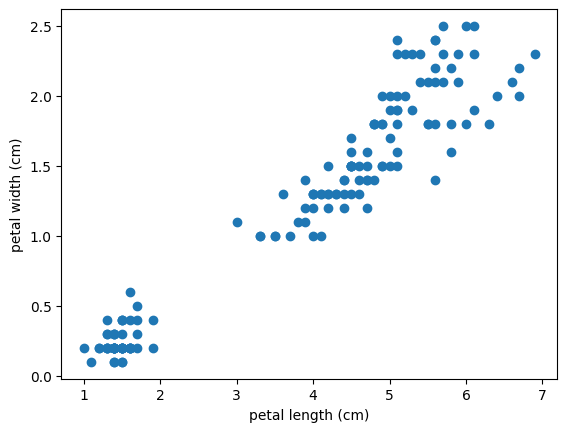

In [54]:
# plot a scater plot of the dataset
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.scatter(final["petal length (cm)"],final["petal width (cm)"])

we can observe 2 clusters

In [91]:
# create KMeans object
# we use 3 clusters and run the k-means algorithm 10 times with different centroid seeds
k = KMeans(n_clusters=4,n_init=10)
k

KMeans(n_clusters=4, n_init=10)

In [92]:
# lets train and make predictions
# this identifies 3 clusters and assign them new labels ie 0,1 &2
y_predit = k.fit_predict(final[["petal length (cm)","petal width (cm)"]])
y_predit

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 3, 0, 3, 3, 0, 3, 0, 3,
       0, 0, 3, 0, 3, 3, 0, 3, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 3, 0, 3, 3,
       3, 0, 0, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 0], dtype=int32)

In [93]:
# lets append the clusters to our dataframe
final["cluster"] = y_predit
final.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


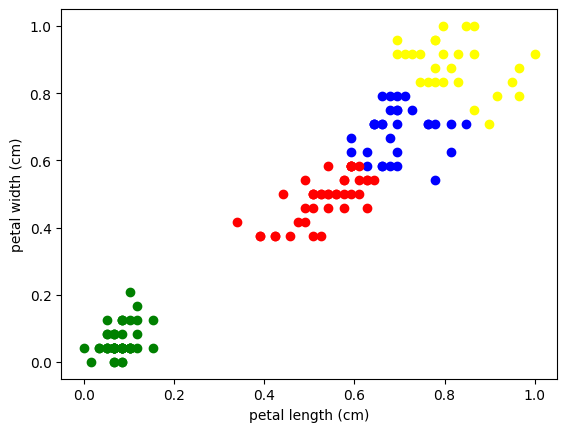

In [96]:
# now lets plot the resutant on a scatter plot
# lets separate these clusters
final0 = final[final.cluster==0]
final1 = final[final.cluster==1]
final2 = final[final.cluster==2]
final3 = final[final.cluster==3]

plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.scatter(final0["petal length (cm)"],final0["petal width (cm)"],color="blue")
plt.scatter(final1["petal length (cm)"],final1["petal width (cm)"],color="green")
plt.scatter(final2["petal length (cm)"],final2["petal width (cm)"],color="red")
plt.scatter(final3["petal length (cm)"],final3["petal width (cm)"],color="yellow")

In [98]:
# lets now scale the income. This will make the scale 0 to 1 on the y-axis
# lets scale the age also
scale = MinMaxScaler()
scale.fit(final[["petal length (cm)","petal width (cm)"]])
final[["petal length (cm)","petal width (cm)"]]=scale.transform(final[["petal length (cm)","petal width (cm)"]])
final.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


In [101]:
# use K Cluster model to train our scale dataset
k = KMeans(n_clusters=4, n_init="auto")
y_predit=k.fit_predict(final[["petal length (cm)","petal width (cm)"]])
y_predit

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 3,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2,
       2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [103]:
# lets drop the previous cluster and update with new one
final["cluster"] = y_predit
final

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0
...,...,...,...
145,0.711864,0.916667,2
146,0.677966,0.750000,1
147,0.711864,0.791667,2
148,0.745763,0.916667,2


In [104]:
# our centroids
# they are in form of X,Y
k.cluster_centers_

array([[0.07830508, 0.06083333],
       [0.66422355, 0.6463964 ],
       [0.81519956, 0.86693548],
       [0.51112288, 0.46484375]])

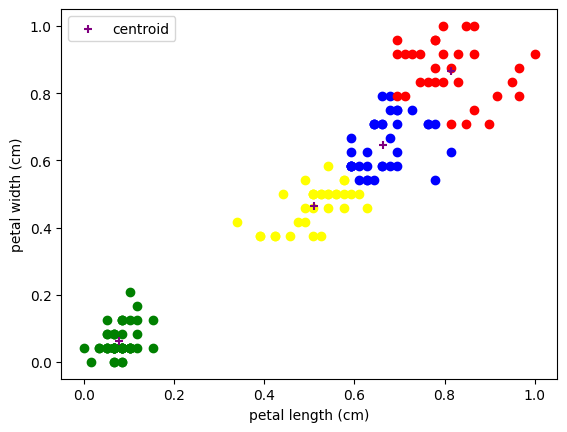

In [107]:
# now lets plot it on a scatter plot with the centroids
final0 = final[final.cluster==0]
final1 = final[final.cluster==1]
final2 = final[final.cluster==2]
final3 = final[final.cluster==3]

plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.scatter(final0["petal length (cm)"],final0["petal width (cm)"], color="green")
plt.scatter(final1["petal length (cm)"],final1["petal width (cm)"],color="blue")
plt.scatter(final2["petal length (cm)"],final2["petal width (cm)"],color="red")
plt.scatter(final3["petal length (cm)"],final3["petal width (cm)"],color="yellow")

# [:,0] means all rows first column, [:,1] means all rows second column
plt.scatter(k.cluster_centers_[:,0],k.cluster_centers_[:,1],color="purple",marker="+",label="centroid")
plt.legend()

In [120]:
# lets define k range from 1-20
# we will find sse and store all the values in the array and then plot the result
# inertia will give the sum of sqr error and append it ot sse
k_rg = range(1,20)
sqr_se = []
for i in k_rg:
    k = KMeans(n_clusters=i,n_init=10)
    k.fit(final[["petal length (cm)","petal width (cm)"]])
    sqr_se.append(k.inertia_)

In [121]:
# print the sqr_se
sqr_se

[28.368353219727197,
 5.176463590044368,
 1.701874688192097,
 1.1588792731667124,
 0.8538617353912241,
 0.6806539059219305,
 0.5656776810037091,
 0.4931360038635194,
 0.41558741347112577,
 0.36396035892996326,
 0.3315469570535575,
 0.3024473099495318,
 0.27687706524272543,
 0.257692159955563,
 0.23877020978808278,
 0.20942183279716498,
 0.20043003839551754,
 0.18204388035401484,
 0.17281295423049317]

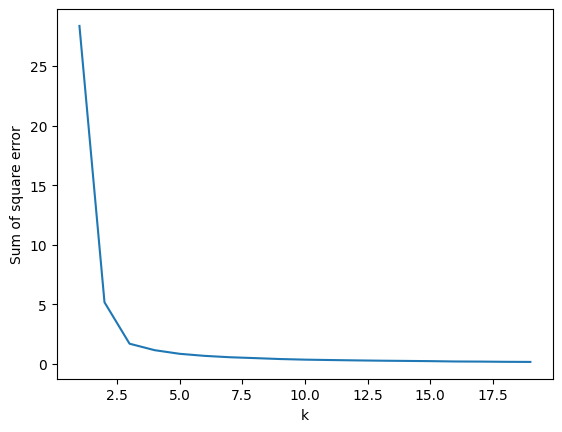

In [122]:
# now lets plot sqr_se in chart
plt.xlabel("k")
plt.ylabel("Sum of square error")
plt.plot(k_rg,sqr_se)